#### EP4130: Data Science Analysis

#### Assignment 5

#### Tanmay Goyal- AI20BTECH11021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from sklearn.mixture import GaussianMixture

**Question 1**

Take the dataset from https://astrostatistics.psu.edu/datasets/asteroid_dens.dat, and apply the Shapiro-Wilk test to the densities and the log of the densities. From the p-values, which of these is closer to a Gaussian? Verify this by plotting the histograms of both density and logarithms of the densities and overlay the best-fit Gaussian Distribution.

In [2]:
data = np.array([[2.12, 0.04],
[2.71, 0.11],
[3.44, 0.12],
[2.76, 1.20],
[2.72, 0.12],
[0.96, 0.30],
[2.00, 0.60],
[3.26, 0.60],
[2.50, 0.30],
[1.20, 0.40],
[1.62, 0.30],
[1.30, 0.00],
[1.96, 0.34],
[2.60, 0.50],
[1.30, 0.20],
[2.67, 0.03],
[4.40, 2.10],
[1.80, 0.80],
[4.90, 3.90],
[2.39, 0.90],
[1.62, 1.05],
[1.47, 0.95],
[0.89, 0.13],
[2.52, 0.30],
[1.21, 0.25],
[0.90, 0.10],
[0.80, 0.15]])

The p-value for the densities to belong to normal distribution by the Shapiro-Wilk Test is 0.051220282912254333
The p-value for the logarithms of the densities to belong to normal distribution by the Shapiro-Wilk Test is 0.5660613775253296
According to the p-values, the logarithms of the densities are more likely to belong to normal distribution.


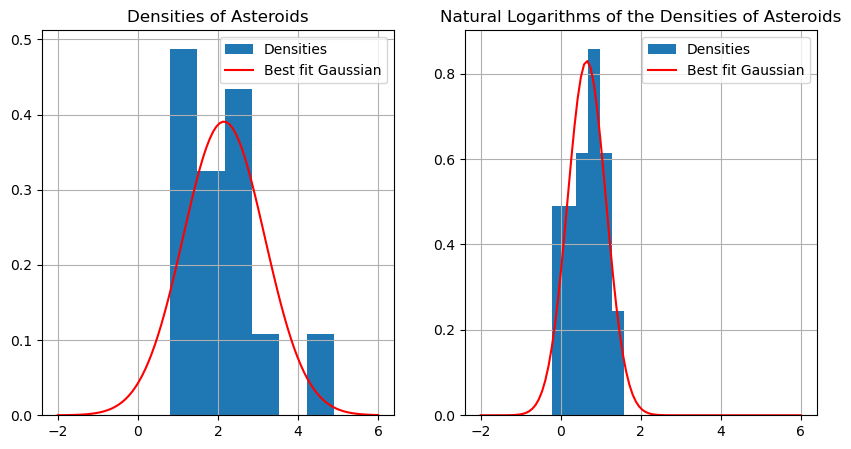

In [3]:
densities = data[: , 0]
uncertainities = data[: , 1]

# finding the pvalue for densities
print("The p-value for the densities to belong to normal distribution by the Shapiro-Wilk Test is {}".\
    format(sp.stats.shapiro(densities)[1]))

# finding the pvalue for logarithms of densities
print("The p-value for the logarithms of the densities to belong to normal distribution by the Shapiro-Wilk Test is {}".\
    format(sp.stats.shapiro(np.log(densities))[1]))

print("According to the p-values, the logarithms of the densities are more likely to belong to normal distribution.")

# obtaining the loc and scales for best fit Gaussians
mu , sigma = sp.stats.norm.fit(densities)
mu_log , sigma_log = sp.stats.norm.fit(np.log(densities))

x = np.linspace(-2 , 6 , 100)

# plotting the histograms
plt.figure(figsize = (10 , 5))
plt.subplot(1 , 2 , 1)
plt.hist(densities , bins = 'auto' , density = True , label = "Densities")
plt.plot(x , sp.stats.norm.pdf(x , mu , sigma) , 'r-' , label = "Best fit Gaussian")
plt.legend()
plt.grid()
plt.title("Densities of Asteroids")

plt.subplot(1 , 2 , 2)
plt.hist(np.log(densities) , bins = 'auto', density = True , label = "Densities")
plt.plot(x , sp.stats.norm.pdf(x , mu_log , sigma_log) , 'r-' , label = "Best fit Gaussian")
plt.legend()
plt.grid()
plt.title("Natural Logarithms of the Densities of Asteroids")
plt.show()

**Question 2**

Download the Hipparcos Star Catalogue from https://people.iith.ac.in/shantanud/HIP_star.dat. Calculate using two-sample t-test whether the color of the Hyades stars differs from that of the Non-Hyades ones. The hyades stars have Right Ascension between $50^\circ$ and $100^\circ$, declinations between $0^\circ$ and $25^\circ$, proper motion in RA between 90 and 130 mas/year, proper motion in DEC between -60 and -10 mas/year. Any other star which does not satisfy any of the above conditions is considered a non-Hyades star.

In [4]:
data = pd.read_csv("Hipparcos_Star.csv" , sep = " ")
data

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
0,2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,3.10,0.999
1,38,8.65,0.111047,-79.061831,23.84,162.30,-62.40,0.78,0.778
2,47,10.78,0.135192,-56.835248,24.45,-44.21,-145.90,1.97,1.150
3,54,10.57,0.151656,17.968956,20.97,367.14,-19.49,1.71,1.030
4,74,9.93,0.221873,35.752722,24.22,157.73,-40.31,1.36,1.068
...,...,...,...,...,...,...,...,...,...
2714,118207,8.38,359.662248,77.262113,23.37,18.87,-44.04,0.70,0.651
2715,118213,8.28,359.690763,31.939823,20.33,76.66,-134.59,0.94,0.734
2716,118251,8.16,359.778318,41.170547,22.91,82.20,3.56,0.82,0.652
2717,118254,7.72,359.787381,41.201736,22.19,80.21,4.40,0.80,0.563


In [5]:
# subsetting the hyades stars
hyades = data[(data['RA'] >= 50) & (data['RA'] <= 100) & (data['DE'] >= 0) & (data['DE'] <= 25) & \
    (data['pmRA'] >= 90) & (data['pmRA'] <= 130) & (data['pmDE'] >= -60) & (data['pmDE'] <= -10)]
hyades

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
532,18735,5.89,60.202858,18.194069,21.99,129.49,-28.27,0.81,0.319
536,18946,10.12,60.912353,19.455094,23.07,119.02,-34.19,2.12,1.095
540,19148,7.85,61.566899,15.698168,21.41,118.53,-19.59,1.47,0.593
542,19207,10.49,61.754794,15.335078,23.57,122.63,-18.96,2.26,1.180
544,19261,6.02,61.924609,15.162843,21.27,127.06,-22.75,1.03,0.397
...,...,...,...,...,...,...,...,...,...
679,21762,9.47,70.105891,16.513734,23.65,91.94,-30.69,2.53,1.096
688,22044,5.39,71.107373,11.146169,20.73,98.87,-13.47,0.88,0.251
694,22224,9.60,71.705813,17.748406,24.11,96.93,-33.93,1.72,0.967
704,22496,7.10,72.599450,17.202738,22.96,102.78,-29.70,1.17,0.563


In [6]:
# subsetting the non-hyades stars
non_hyades = data[~data.index.isin(hyades.index)]
non_hyades

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
0,2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,3.10,0.999
1,38,8.65,0.111047,-79.061831,23.84,162.30,-62.40,0.78,0.778
2,47,10.78,0.135192,-56.835248,24.45,-44.21,-145.90,1.97,1.150
3,54,10.57,0.151656,17.968956,20.97,367.14,-19.49,1.71,1.030
4,74,9.93,0.221873,35.752722,24.22,157.73,-40.31,1.36,1.068
...,...,...,...,...,...,...,...,...,...
2714,118207,8.38,359.662248,77.262113,23.37,18.87,-44.04,0.70,0.651
2715,118213,8.28,359.690763,31.939823,20.33,76.66,-134.59,0.94,0.734
2716,118251,8.16,359.778318,41.170547,22.91,82.20,3.56,0.82,0.652
2717,118254,7.72,359.787381,41.201736,22.19,80.21,4.40,0.80,0.563


In [7]:
hyades_colors = np.array(hyades['B-V'].tolist())
non_hyades_colors = np.array(non_hyades['B-V'].tolist())

print('The p-value for the null hypothesis that the color of Haydes stars and non-Haydes stars have identical means is {}'.\
    format(sp.stats.ttest_ind(hyades_colors , non_hyades_colors)[1]))

print("Since the p-value is very small, the colors of the two kinds of stars are not very similar.")

The p-value for the null hypothesis that the color of Haydes stars and non-Haydes stars have identical means is 0.00011582222192442334
Since the p-value is very small, the colors of the two kinds of stars are not very similar.


**Question 3**

The T90 distribution for Beppo-Sax T90 data can be found at http://www.iith.ac.in/~shantanud/beppoSax.txt. Apply GMM to $\log_{10}$ of T90 data and find the optimum number of components using AIC and BIC by plotting BIC as a function of number of components.

In [8]:
data = np.genfromtxt("Beppo-Sax T90.csv")

In [9]:
log_data = np.log10(data)
log_data = log_data.reshape(-1 , 1)

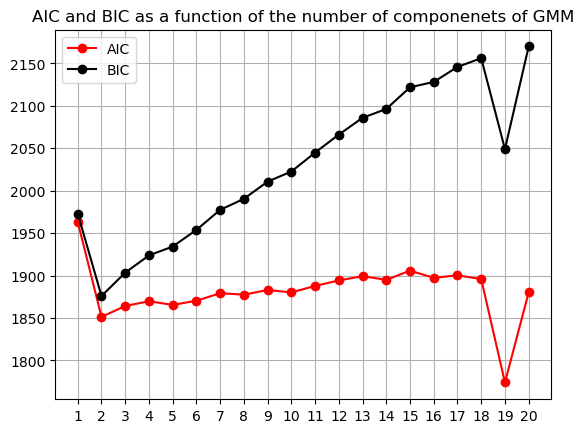

The optimal number of components is 2.


In [10]:
# We loop over 1 to 20 components in GMMs
n_components = np.arange(1 , 21)
models = []
AIC = []
BIC = []
for n in n_components:
    models.append(GaussianMixture(n_components = n , max_iter = 1000).fit(log_data))
    AIC.append(models[-1].aic(log_data))
    BIC.append(models[-1].bic(log_data))

# plotting the AIC and BIC
plt.plot(n_components , AIC , 'ro-' ,label = 'AIC')
plt.plot(n_components , BIC , 'ko-' ,label = 'BIC')
plt.grid()
plt.xticks(n_components)
plt.title("AIC and BIC as a function of the number of componenets of GMM")
plt.legend()
plt.show()

print("The optimal number of components is 2.")